In [180]:
import pandas as pd
import math
from fuzzywuzzy import fuzz
import numpy as np

pd.options.display.max_rows = 999
pd.options.display.max_columns = 200

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

import glob

import warnings
warnings.filterwarnings("ignore")


In [9]:
data = pd.read_excel('nickel_mine_final.xlsx')

In [10]:
# files = glob.glob('../data/USGS/MRDS_raw_data/*.txt')
# for i in files:
#     print(i)
#     pd.read_table(i).head()


In [196]:
datadic = pd.read_table('../data/USGS/MRDS_raw_data/Datadxny.txt')
# datadic[datadic['tblname']=='deposits']
datadic

,i,id,tblorder,tblname,number,label,category,short_desc,description,link,origin,sqltype,dbftype,width,prec,units
0,1,385,30,resource_detail,2.0,YR,Production and resources,Year,Four digit year for which the resources estima...,NaN,NaN,varchar,C,4.0,NaN,NaN
1,2,2,1,ages,1.0,DEP_ID,Site identification,Record ID,Site or deposit identification number within t...,NaN,NaN,varchar,C,10.0,NaN,NaN
2,3,3,1,ages,2.0,ROCK_LINE,Site characteristics,Rock record id,Sequence index of the entry in the rocks table...,NaN,NaN,int,N,8.0,NaN,NaN
3,4,4,1,ages,3.0,AGE_LINE,Site characteristics,Age record id,"Sequence index, for the given DEP_ID and ROCK_...",NaN,NaN,int,N,8.0,NaN,NaN
4,5,5,1,ages,4.0,AGE_TP,Site characteristics,Age type,Type of age described: rock (formation) or min...,NaN,NaN,varchar,C,20.0,NaN,NaN
5,6,6,1,ages,5.0,CHRON_AGE,Site characteristics,Chronological age,Numerical age estimate,NaN,NaN,double,N,8.0,NaN,NaN
6,7,7,1,ages,6.0,PLUS_MINUS,Site characteristics,Age uncertainty,Uncertainty in the age estimate; age is normal...,NaN,NaN,double,N,8.0,NaN,NaN
7,8,8,1,ages,7.0,METHOD,Site characteristics,Age determination method,Analytical method by which the age was determi...,NaN,NaN,varchar,C,50.0,NaN,NaN
8,9,9,1,ages,8.0,MEDIA,Site characteristics,Material analyzed,"Material analyzed to determine the age, typica...",NaN,NaN,varchar,C,40.0,NaN,NaN
9,10,10,1,ages,9.0,AGE_YOUNG_BA,Site characteristics,Young age modifier,Modifier to indicate the younger age estimate ...,NaN,NaN,varchar,C,5.0,NaN,NaN


## USGS

In [61]:
main = pd.read_table('../data/USGS/MRDS_raw_data//MRDS.txt')
main.head()


,i,dep_id,name,dev_stat,url,code_list,longitude,latitude
0,1,10000013,Moonshine Prospect,Occurrence,https://mrdata.usgs.gov/mrds/show-mrds.php?dep...,AU CU,-132.05371,55.14445
1,2,10000027,Hetta Mountain Prospects,Occurrence,https://mrdata.usgs.gov/mrds/show-mrds.php?dep...,CU ZN AG,-132.56846,55.19973
2,3,10000134,Miller Claim,Occurrence,https://mrdata.usgs.gov/mrds/show-mrds.php?dep...,CU,-133.07124,55.05389
3,4,10000264,Upper Daly-Alaska,Past Producer,https://mrdata.usgs.gov/mrds/show-mrds.php?dep...,AG,-130.03925,56.02894
4,5,10000512,Porcupine Creek Area,Past Producer,https://mrdata.usgs.gov/mrds/show-mrds.php?dep...,AU,-136.23546,59.41641


In [62]:
location = pd.read_table('../data/USGS/MRDS_raw_data/Location.txt')
location['update_date'] = pd.to_datetime(location['update_date'])
location = location.sort_values(by='update_date', ascending=False).drop_duplicates(['dep_id'], keep='first')
location.head()


,i,dep_id,line,region,country,state_prov,county,lu_code,inserted_by,insert_date,updated_by,update_date
306709,306710,10157558,1,NaN,United States,Wyoming,Fremont,16801,AWILSON,2012-01-31T13:45:56,AWILSON,2012-01-31 13:46:19
84807,84808,10038701,1,AF,Congo (Kinshasa),Katanga,NaN,10020,MRDS migration,29-OCT-02,DCAUSEY,2011-07-19 00:00:00
290333,290334,10400379,1,AF,Zambia,Copperbelt,NaN,10801,AWILSON,04-JUN-10,DCAUSEY,2011-06-07 00:00:00
290329,290330,10400375,1,AF,Zambia,Copperbelt,NaN,10801,AWILSON,04-JUN-10,DCAUSEY,2011-06-07 00:00:00
302751,302752,10400554,1,AF,Zambia,Lusaka,NaN,10802,DCAUSEY,03-JUN-11,DCAUSEY,2011-06-03 00:00:00


In [63]:
main = pd.merge(main, location, how='inner', on=['dep_id'])
main = main[main['code_list'].astype(str).str.contains('NI')]
main.head()
main.shape


,i_x,dep_id,name,dev_stat,url,code_list,longitude,latitude,i_y,line,region,country,state_prov,county,lu_code,inserted_by,insert_date,updated_by,update_date
184,185,10024495,Greenvale Mine,Producer,https://mrdata.usgs.gov/mrds/show-mrds.php?dep...,NI,144.98213,-18.91356,72304,1,OC,Australia,Queensland,NaN,13560,MRDS migration,29-OCT-02,USGS,2002-10-03
451,452,10060670,Sao Sebastiao,Occurrence,https://mrdata.usgs.gov/mrds/show-mrds.php?dep...,NI,-51.96584,-6.16476,83888,1,SA,Brazil,Para,NaN,12638,MRDS migration,29-OCT-02,USGS,2002-10-03
460,461,10061749,Fazenda Lavrada,Occurrence,https://mrdata.usgs.gov/mrds/show-mrds.php?dep...,NI ASB,-37.53223,-7.21467,77593,1,SA,Brazil,Paraiba,NaN,12639,MRDS migration,29-OCT-02,USGS,2002-10-03
517,518,10070069,"Longvack South Nickel Mine, Falconbridge: Canada",Producer,https://mrdata.usgs.gov/mrds/show-mrds.php?dep...,NI,-81.49979,46.66666,6497,1,NaN,Canada,Ontario,NaN,12301,MRDS migration,29-OCT-02,USGS,2002-10-03
518,519,10070071,Birchtree,Producer,https://mrdata.usgs.gov/mrds/show-mrds.php?dep...,NI CO AU,-97.91715,55.70007,76488,1,NaN,Canada,Manitoba,NaN,12297,MRDS migration,29-OCT-02,USGS,2002-10-03


(1561, 19)

In [64]:
#  ownership = pd.read_table('../data/USGS/MRDS_raw_data/Ownership.txt')
#  ownership['update_date'] = pd.to_datetime( ownership['update_date'])
#  ownership =  ownership.sort_values(by='update_date', ascending=False).drop_duplicates(['dep_id'], keep='first')
# main = pd.merge(main,  ownership, how='left', on=['dep_id'])


In [65]:
# Commodity = pd.read_table('../data/USGS/MRDS_raw_data/Commodity.txt')
# Commodity['update_date'] = pd.to_datetime(Commodity['update_date'])
# Commodity = Commodity.sort_values(by='update_date', ascending=False).drop_duplicates(['dep_id', 'commod'], keep='first')

# Commodity_cleaned = pd.DataFrame(index=Commodity['dep_id'].unique())
# Commodity_cleaned['commod_group'] = Commodity.groupby('dep_id')['commod_group'].apply(list)
# Commodity_cleaned['import'] = Commodity.groupby('dep_id')['import'].apply(list)
# Commodity_cleaned['commod_tp'] = Commodity.groupby('dep_id')['commod_tp'].apply(list)
# Commodity_cleaned.index.name = 'dep_id'
# Commodity_cleaned = Commodity_cleaned.reset_index()

# main = pd.merge(main, Commodity_cleaned, how='left', on='dep_id')
# main = main.dropna(subset=['commod_group'])
# main.head()


In [66]:
# main_comm = pd.read_table('../data/USGS/MRDS_raw_data/Commodity.txt')
# main_comm = main_comm[main_comm['commod_group'].str.contains('Nickel')]
# main_comm['update_date'] = pd.to_datetime(main_comm['update_date'])
# main_comm = main_comm.sort_values(by='update_date', ascending=False).drop_duplicates(['dep_id', 'commod'], keep='first')
# main_comm.shape
# main_comm.head()

# main = pd.merge(main, main_comm, how='inner', on='dep_id')


In [68]:
Resource_detail = pd.read_table('../data/USGS/MRDS_raw_data//Resource_detail.txt')
Resource_detail = Resource_detail[Resource_detail['commod_group'].str.contains('Nickel')]
Resource_detail = Resource_detail.sort_values(by='yr', ascending=False).drop_duplicates(['dep_id'], keep='first')
Resource_detail.shape
Resource_detail.head()

main = pd.merge(main, Resource_detail, how='left', on='dep_id')


(369, 16)

,i,dep_id,yr,line,rec,code,commod,commod_group,import,item,grd,grd_units,inserted_by,insert_date,updated_by,update_date
20991,20992,10400290,2009,1,1,NI,Nickel,Nickel,Primary,NaN,3.570,wt-pct,PSCHRUBE,06-APR-10,NaN,NaN
6858,6859,10096418,2009,2,2,NI,Nickel,Nickel,Primary,NaN,0.260,wt-pct,PSCHRUBE,04-MAY-2009 06:44:16,PSCHRUBE,04-MAY-2009 06:50:14
10051,10052,10400411,2009,1,3,NI,Nickel,Nickel,Secondary,Ni,0.098,wt-pct,DCAUSEY,20-JUL-10,DCAUSEY,20-JUL-10
20967,20968,10400371,2007,1,5,NI,Nickel,Nickel,Primary,NaN,0.019,wt-pct,AWILSON,04-JUN-10,NaN,NaN
4479,4480,10072944,2005,1,2,NI,Nickel,Nickel,Major,NaN,0.200,wt-pct,"Woodruff, Laurel G.",27-SEP-2006 00:00:00,"Woodruff, Laurel G.",27-SEP-2006 00:00:00


In [71]:
deposits = pd.read_table('../data/USGS/MRDS_raw_data/Deposits.txt')
deposits = deposits.sort_values(by='update_date', ascending=False).drop_duplicates(['dep_id'], keep='first')
deposits.shape
deposits.head()

main = pd.merge(main, deposits, how='left', on='dep_id')


(304632, 30)

,i,dep_id,rec_tp,dev_st,dep_tp,plant_tp,plant_ident,oper_tp,min_meth,mill_meth,yfp_ba,yr_fst_prd,ylp_ba,yr_lst_prd,disc_meth,dy_ba,disc_yr,prod_yrs,discr,mas_id,mrds_id,sig,prod_size,site_commod_type,deposit_size,min_area_name,inserted_by,insert_date,updated_by,update_date
4736,4737,10022895,Site,Occurrence,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160070035.0,FS00404,N,N,N,NaN,NaN,MRDS migration,12-MAR-2002 00:00:00,WBFERGUS,31-OCT-2008 17:35:53
184042,184043,10089391,Site,Prospect,NaN,NaN,NaN,Surface,NaN,NaN,NaN,NaN,NaN,NaN,Ore-Mineral In Place,NaN,NaN,NaN,NaN,0160810062,W019301,N,N,N,S,NaN,MRDS migration,12-MAR-2002 00:00:00,WBFERGUS,31-OCT-2008 17:28:49
240141,240142,10073310,Site,Occurrence,NaN,NaN,NaN,Surface,NaN,NaN,NaN,NaN,NaN,NaN,Ore-Mineral In Place,NaN,NaN,NaN,NaN,160810053.0,W019334,N,N,N,S,NaN,MRDS migration,12-MAR-2002 00:00:00,WBFERGUS,31-OCT-2008 17:22:54
240087,240088,10073309,Site,Past Producer,NaN,NaN,NaN,Surface,NaN,NaN,NaN,NaN,NaN,NaN,Ore-Mineral In Place,NaN,NaN,NaN,NaN,160810066.0,W019333,N,S,N,S,NaN,MRDS migration,12-MAR-2002 00:00:00,WBFERGUS,31-OCT-2008 12:14:31
21859,21860,10105933,Site,Past Producer,NaN,NaN,NaN,Surface,NaN,NaN,NaN,NaN,NaN,NaN,Ore-Mineral In Place,NaN,NaN,NaN,NaN,160810049.0,W019267,N,S,N,M,NaN,MRDS migration,12-MAR-2002 00:00:00,WBFERGUS,31-OCT-2008 12:04:10


<AxesSubplot:>

<AxesSubplot:>

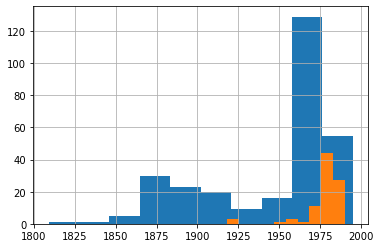

In [77]:
main['yr_fst_prd'].hist()
main['yr_lst_prd'].hist()


# match

In [83]:
# set(data.country_name) - set(main.country)
# set(main.country) - set(data.country_name)


In [78]:
country_dic = {}
country_dic.update({'USA':'United States', 'South Sudan':'Sudan', 'South Korea':'Korea, South',
                    'North Korea':'Korea, North', 'Rep. Of the Congo':'Congo (Brazzaville)',
                    'Dem. Rep. Congo':'Congo (Kinshasa)', 'North Macedonia':'Macedonia',
                    "Cote d'Ivoire":"Cote D'Ivoire", 'Bosnia & Herzegovina':'Bosnia and Herzegovina',
                    'Hong Kong, China':'China', 'Greenland':'Denmark', 'Czechia':'Czech Republic'})

country_dic2 = {}
country_dic2.update({'Taiwan':'Taiwan, China', 'Bahamas, The':'Bahamas, the', 'Dominica':'Dominican Republic'})


In [102]:
data['country_name'] = data['country_name'].replace(country_dic)
main['country'] = main['country'].replace(country_dic2)
main['name_new'] = main.apply(lambda x: str(x['name'])+' '+str(x['latitude'])+' '+str(x['longitude']), axis=1) 
data['prop_name_new'] = data.apply(lambda x: str(x['prop_name'])+' '+str(x['latitude'])+' '+str(x['longitude']), axis=1) 


In [103]:
EARTH_REDIUS = 6378.137

def rad(d):
    return d * np.pi / 180.0

def getDistance(lat1, lng1, lat2, lng2):
    radLat1 = rad(lat1)
    radLat2 = rad(lat2)
    a = radLat1 - radLat2
    b = rad(lng1) - rad(lng2)
    s = 2 * math.asin(math.sqrt(math.pow(math.sin(a/2), 2) + math.cos(radLat1) * math.cos(radLat2) * math.pow(math.sin(b/2), 2)))
    s = s * EARTH_REDIUS
    return s


In [183]:
idx = 0
lst = []
for c in set(data['country_name']):
    idx += 1
    print(idx, c)
    
    sp = data[data['country_name']==c]
    usgs = main[main['country']==c]
    for i in sp[['prop_name', 'latitude', 'longitude', 'prop_name_new', 'actv_status', 'also_known_as']].values:
        for j in usgs[['name', 'latitude', 'longitude', 'name_new', 'dev_stat', 'yr_fst_prd', 'yr_lst_prd']].values:
            d = getDistance(i[1], i[2], j[1], j[2])
            if d<100:
                r = fuzz.ratio(i[0], j[0])
                if not pd.isna(i[-1]):
                    r2 = fuzz.partial_ratio(i[-1], j[0])
                    lst += [[i[3], j[3], i[-1], r, r2, d, i[-2], j[-3], j[-2], j[-1], c]]
                else:
                    lst += [[i[3], j[3], i[-1], r, np.nan, d, i[-2], j[-3], j[-2], j[-1], c]]


1 Russia
2 Turkey
3 Vietnam
4 Zimbabwe
5 Philippines
6 Colombia
7 Guatemala
8 Solomon Islands
9 Papua New Guinea
10 Guinea
11 Saudi Arabia
12 Yemen
13 Korea, North
14 Tanzania
15 Tonga
16 Denmark
17 Ethiopia
18 United Kingdom
19 Gabon
20 Congo (Kinshasa)
21 Myanmar
22 Slovakia
23 China
24 Cote D'Ivoire
25 South Africa
26 Cuba
27 Burundi
28 Spain
29 France
30 Guyana
31 Macedonia
32 Germany
33 Laos
34 Brazil
35 Madagascar
36 Serbia
37 Sierra Leone
38 Zambia
39 Uganda
40 Taiwan, China
41 New Zealand
42 Norway
43 Indonesia
44 Burkina Faso
45 Italy
46 Togo
47 Austria
48 Cameroon
49 Ukraine
50 Argentina
51 India
52 Australia
53 Mexico
54 Paraguay
55 Malaysia
56 Korea, South
57 Mauritania
58 Poland
59 Dominican Republic
60 Sweden
61 Japan
62 Portugal
63 Mozambique
64 New Caledonia
65 Finland
66 Botswana
67 Greece
68 Peru
69 Albania
70 Canada
71 Kazakhstan
72 United States
73 Venezuela


In [185]:
match = pd.DataFrame(lst,
                     columns = ['prop_name_SP', 'prop_name_USGS', 'also_known_as', 'r1', 'r2', 'distance', 'dev_st_SP', 'dev_st_USGS', 'yr_fst_prd', 'yr_last_prd', 'country_name'])

match.head()

,prop_name_SP,prop_name_USGS,also_known_as,r1,r2,distance,dev_st_SP,dev_st_USGS,yr_fst_prd,yr_last_prd,country_name
0,Polar Division 69.28199 88.16999,Norilsk Nickel Plant 69.2978 88.20033,"Glubokij, Khalilskaya, Khalilsky, Komsomol, Ko...",24,20.0,2.126980,Active,Plant,NaN,NaN,Russia
1,Polar Division 69.28199 88.16999,Oktyabrsky-Talnakh Nickel-Copper Deposits-U.S....,"Glubokij, Khalilskaya, Khalilsky, Komsomol, Ko...",19,30.0,8.629345,Active,Occurrence,NaN,NaN,Russia
2,Polar Division 69.28199 88.16999,Mt. Chernaya 69.19669 88.30199,"Glubokij, Khalilskaya, Khalilsky, Komsomol, Ko...",8,33.0,10.830263,Active,Prospect,NaN,NaN,Russia
3,Polar Division 69.28199 88.16999,Noril'Sk I 69.34725 88.19089,"Glubokij, Khalilskaya, Khalilsky, Komsomol, Ko...",25,20.0,7.311048,Active,Past Producer,NaN,NaN,Russia
4,Kola Division 69.39995 30.73034,(Facility) Pechenga Smelter 69.39853 30.25362,"Bistrinskoe, Bystrinskoe, Bystrinskoye, Flango...",15,48.0,18.672893,Active,Plant,1938.0,NaN,Russia


<AxesSubplot:>

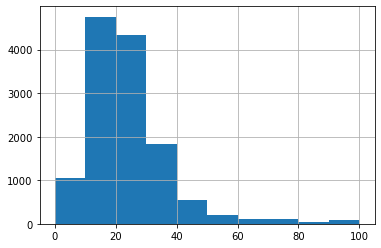

In [186]:
match['r1'].hist()

In [187]:
s1 = match[match['r1'] > 90]['prop_name_SP'].unique()
s2 = match[match['r2'] > 90]['prop_name_SP'].unique()

In [188]:
len(set(s1) | set(s2))

133

In [189]:
s3 = main[main['yr_fst_prd'].notnull()]['name_new'].unique()
s4 = match[match['r1'] > 90]['prop_name_USGS'].unique()
s5 = match[match['r2'] > 90]['prop_name_USGS'].unique()


In [190]:
len(s3)
len(set(s3) & (set(s4) | set(s5)))

265

29

In [191]:
match['prop_name_SP'].nunique()

850

In [192]:
match[['rank1', 'rank2']] = match.groupby('prop_name_SP')[['r1', 'r2']].rank()


In [195]:
match.sort_values(by=['distance'], ascending=True).dropna(subset=['yr_fst_prd']).head(999)


,prop_name_SP,prop_name_USGS,also_known_as,r1,r2,distance,dev_st_SP,dev_st_USGS,yr_fst_prd,yr_last_prd,country_name,rank1,rank2
5920,Ontario Division 46.49222 -81.06667,Copper Cliff North Mine 46.49166 -81.06645,"153, 170, Blezard, Clarabelle Mill, Clydach, C...",5,83.0,0.064579,Active,Producer,1967.0,1978.0,Canada,3.0,92.5
5971,Ontario Division 46.49222 -81.06667,Copper Cliff North Mine 46.49166 -81.06645,"153, 170, Blezard, Clarabelle Mill, Clydach, C...",5,83.0,0.064579,Active,Producer,1967.0,1973.0,Canada,3.0,92.5
12940,Glenbrook 42.96389 -123.44222,Hanna Nickel Mine 42.96372 -123.44336,"NICKEL MOUNTAIN, RIDDLE",15,18.0,0.094775,Inactive,Past Producer,1954.0,NaN,United States,17.0,47.0
12898,Glenbrook 42.96389 -123.44222,Riddle Mine 42.96371 -123.44338,"NICKEL MOUNTAIN, RIDDLE",30,18.0,0.096597,Inactive,Producer,1954.0,1983.0,United States,50.0,47.0
6364,Makwa 50.46475 -95.44883,Maskwa 50.46667 -95.45033,"Aileen, Dumbarton, Keel, Makwa Mayville, Maskw...",91,100.0,0.238703,Active,Prospect,1974.0,1976.0,Canada,5.0,5.0
5844,Guri Kuq 40.917 20.633,Guri Kuq Mine 40.91546 20.63514,NaN,76,NaN,0.248587,Inactive,Producer,1978.0,1984.0,Albania,15.0,NaN
3378,Nickel West Refinery -27.81493 120.70066,Agnew Mine -27.8129 120.69924,NaN,33,NaN,0.265732,Active,Producer,1978.0,1982.0,Australia,13.5,NaN
1176,Morro Do Niquel -22.9167 -46.65,Morro Do Niquel Mine -22.9141 -46.64899,Pratapolis mine,86,43.0,0.307400,Inactive,Producer,1962.0,NaN,Brazil,3.0,3.0
1455,Leinster -27.81424 120.70243,Agnew Mine -27.8129 120.69924,"11 Mile Well, 11-Mile Well, Agnew, Harmony, LN...",44,60.0,0.347706,Active,Producer,1978.0,1982.0,Australia,14.5,10.5
5633,Hitura 63.84917 25.04561,Hitura 63.84852 25.05302,NaN,100,NaN,0.370688,Active,Producer,1970.0,NaN,Finland,5.0,NaN
